<a href="https://colab.research.google.com/github/aashu-0/machine-learning/blob/main/training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# linear regression
# the normal equation

import numpy as np
np.random.seed(42)
m = 100    #no. of instances
X = 2 * np.random.rand(m, 1)     #column vector

y = 4 + 3 * X + np.random.randn(m, 1)     #row vector

In [ ]:
len(X)

100

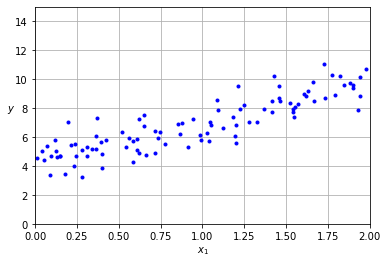

In [ ]:
# plotting randomly generated linear dataset

import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In [ ]:
# include intercept term in model
# X_b = np.c_[np.ones((100,1)), X]

# alter
from sklearn.preprocessing import add_dummy_feature  # add columns of ones to the feature matrix
X_b = add_dummy_feature(X)

In [ ]:
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

#  alter
theta_best = np.linalg.inv(X_b.T @ X_b)@ X_b.T @ y   # @ performs matrix multiplication

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
# predicting using theta_best

X_new= np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

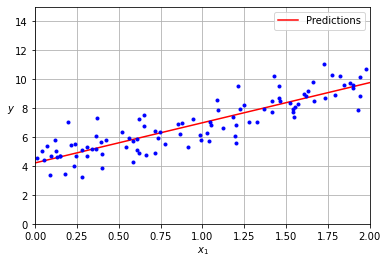

In [ ]:
# plotting linear regression model predictions

plt.plot(X_new, y_predict, 'r-', label = 'Predictions')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [ ]:
# performing linear reg using scikit learn

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [ ]:
# using scipy.linalg.lstsq() function

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = None)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [ ]:
# computing X^+y where X^+ is pseudoinverse of X
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [ ]:
# Gradient Descent

# Batch Gradient Descent

eta = 0.1 # learning rate
n_epoch = 1000  # no. of iteration
m = len(X_b)

np.random.seed(42)

theta = np.random.randn(2,1)   # random intialization

for epoch in range(n_epoch):
    grad = 2/m * X_b.T @ (X_b @ theta - y)     # gradient vector of cost function
    theta = theta - eta * grad              # next step theta

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
# experimenting with diff values of eta

eta = 0.02 # learning rate is too low
n_epoch = 1000  # no. of iteration
m = len(X_b)

np.random.seed(42)

theta = np.random.randn(2,1)   # random intialization

for epoch in range(n_epoch):
    grad = 2/m * X_b.T @ (X_b @ theta - y)     # gradient vector of cost function
    theta = theta - eta * grad             # next step theta

In [ ]:
# the algorithm will eventually reach the sol but takes a longer time
theta

array([[4.21438446],
       [2.77074177]])

In [ ]:

eta = 0.5 # learning rate is too high
n_epoch = 1000  # no. of iteration
m = len(X_b)

np.random.seed(42)

theta = np.random.randn(2,1)   # random intialization

for epoch in range(n_epoch):
    grad = 2/m * X_b.T @ (X_b @ theta - y)     # gradient vector of cost function
    theta = theta - eta * grad              # next step theta

In [ ]:
# algorithm diverges, gets further away from the sol
theta

array([[-7.05138935e+27],
       [-7.98621001e+27]])

In [ ]:
# Stochastic GD
n_epoch = 50
t0, t1 = 5, 50         # learning schedule hyperparams

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)    # random intialization

for epoch in range(n_epoch):
    for itera in range(m):
        rnd_i= np.random.randint(m)

        xi = X_b[rnd_i:rnd_i +1]
        yi = y[rnd_i:rnd_i +1]
        grad = 2*xi.T @ (xi@theta -yi)   # no divide by m in sgd

        eta = learning_schedule(epoch*m + itera)
        theta = theta - eta*grad


In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

In [ ]:
# using SGDRegressor

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None, eta0 = 0.01, n_iter_no_change = 100)

sgd_reg.fit(X, y.ravel())   # y.raval because

SGDRegressor(n_iter_no_change=100, penalty=None, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.21486451]), array([2.77054659]))

In [ ]:
# Polynomial Regression

np.random.seed(42)
m = 100
X = 6* np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

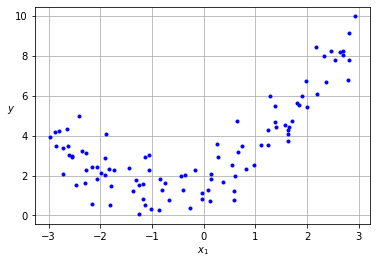

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(X,y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation =0)
plt.grid()
plt.show()

In [ ]:
# using PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_feat.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]       # contains X plus square of the feature

array([-0.75275929,  0.56664654])

In [ ]:
# fittina linear reg model to this extended training data

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

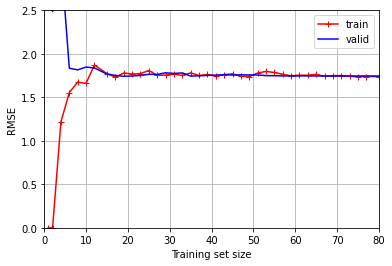

In [ ]:
# learning curves

from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg, X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv =5,
    scoring = 'neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, 'r-+', label = 'train')
plt.plot(train_sizes, valid_errors, 'b-', label = 'valid')

plt.xlabel("Training set size")
plt.ylabel('RMSE')
plt.legend(loc = 'best')
plt.axis([0, 80, 0, 2.5])
plt.grid()
plt.show()

In [ ]:
# above model is underfitting model

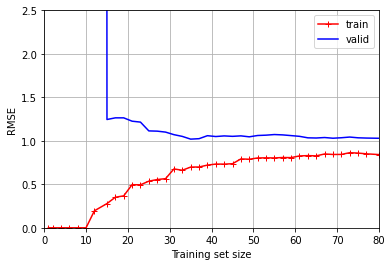

In [ ]:
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(degree=10, include_bias=False),
                         lin_reg)


train_sizes, train_scores, valid_scores = learning_curve(
    poly_reg, X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv =5,
    scoring = 'neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, 'r-+', label = 'train')
plt.plot(train_sizes, valid_errors, 'b-', label = 'valid')

plt.xlabel("Training set size")
plt.ylabel('RMSE')
plt.legend(loc = 'best')
plt.axis([0, 80, 0, 2.5])
plt.grid()
plt.show()

In [ ]:
# above model is overfitting model

In [ ]:
# Regularization of linear models
# ridge
# lasso
# elastic net

In [ ]:
# Ridge
# for most of regularized model, scaling should be done

# generating  random dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5* X + np.random.rand(m,1)/1.5

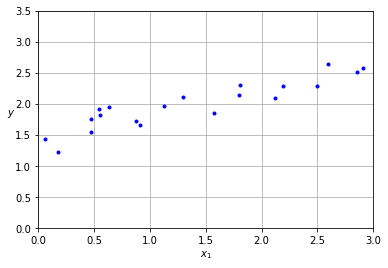

In [ ]:
# plotting randomly generated linear dataset

plt.figure(figsize = (6,4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([0,3,0,3.5])
plt.grid()
plt.show()

In [ ]:
# ridge regression closed form solution

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.1, solver= 'cholesky')
# using matrix factorization technique by André-Louis Cholesky
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[2.03718902]])

In [ ]:
# using sgd

sgd_reg = SGDRegressor(penalty = 'l2', alpha = 0.1/m, tol = None,
                       max_iter = 1000, eta0 =0.01, random_state =42)
sgd_reg.fit(X, y.ravel())  # fit(expects 1d targets)
sgd_reg.predict([[1.5]])

array([2.03636801])

In [ ]:
# lasso regression

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([2.02180523])

In [ ]:
# using sgd[[1.5]]

sgd_reg = SGDRegressor(penalty = 'l1', alpha = 0.1, tol = None,
                       max_iter = 1000, eta0 =0.01, random_state =42)
sgd_reg.fit(X, y.ravel())  # fit(expects 1d targets)
sgd_reg.predict([[1.5]])

array([2.02061809])

In [ ]:
# elastic net regression

from sklearn.linear_model import ElasticNet

elastic_net =  ElasticNet(alpha = 0.1, l1_ratio = 0.5)   # l1_ratio is mix ratio r
elastic_net.fit(X, y.ravel())
elastic_net.predict([[1.5]])

array([2.02732399])

In [ ]:
# early stopping

from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# splitting the quadratic data we produced earlier into train & valid
X_train, y_train = X[: m//2], y[: m//2,0]
X_valid, y_valid = X[m//2:], y[m//2:,0]



preprocessing = make_pipeline(PolynomialFeatures(degree = 90, include_bias = False),
                              StandardScaler())

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)

n_epochs = 500
best_valid_rmse = float('inf')   # setting rmse value to positive infinity

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)    # partial_fit to perform incremental learning
    y_valid_predict = sgd_reg.predict(X_valid_prep)

    val_error = mean_squared_error(y_valid, y_valid_predict, squared = False)

    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

        # evaluating train error
        y_train_predict = sgd_reg.predict(X_train_prep)
        train_error = mean_squared_error(y_train, y_train_predict, squared=False)

# why copy.deepcopy()
# because it copies both the model’s hyperparameters and the learned parameters.
# as sklearn.base.clone() only copies the model’s hyperparameters.

In [ ]:
# This implementation does not actually stop training, but it lets you revert to
# the best model after training

In [ ]:
best_model

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

In [ ]:
best_valid_rmse

0.7277996717324541

In [ ]:
# Logistic Regression
# nothing much to code few equations and that's all

In [ ]:
# Decision Boundaries

from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)

In [ ]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [ ]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# using logistic reg to detect virginica type based only on petal width feature

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target]== 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =42)


log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

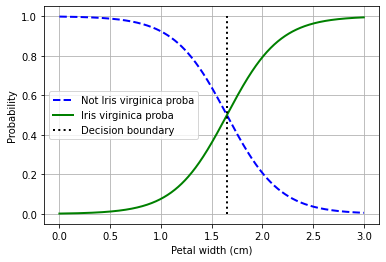

In [ ]:
# model's estimated probabilities

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:,1]>= 0.5][0,0]

# plotting proba of first class against X_new
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
#plotting proba of second class against X_new
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")

# plotting line at the decision boundary (where proba of being iris virginica is 0.5)
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [ ]:
decision_boundary

1.6516516516516517

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

In [ ]:
# softmax regression
# classifing the iris plant into all three classes

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)


# sklearn’s LogisticRegression classifier uses softmax regression automatically when
# it is trained on more than two classes (assuming you use solver="lbfgs", which is
# the default)
# also applies l2 regularization by default which can be controllled using c

softmax_reg = LogisticRegression(C=30, random_state = 42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [ ]:
# type of irirs with petal 5cm long and 2cm wide

softmax_reg.predict([[5,2]])

array([2])

In [ ]:
# class 2 = iris virginica

In [ ]:
# estimating proba
softmax_reg.predict_proba([[5,2]]).round(2)   # round(2) to round off upto 2 digits

array([[0.  , 0.04, 0.96]])

In [ ]:
# 96% proba that iris is virginica, 4% that it is versicolor, 0% thta it is setosa